In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

#define transform to normalize the data

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [2]:
#Building the feed forward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))

criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

#forward Pass
logits = model(images)
loss = criterion(logits, labels)

print(loss)

tensor(2.2922, grad_fn=<NllLossBackward>)


In [3]:
#Build  a  feedForward networl

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
#flattten images
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

print(loss)


tensor(2.3029, grad_fn=<NllLossBackward>)


In [4]:
###Autograd

In [5]:
x = torch.zeros(1, requires_grad=True)
with torch.no_grad():
    y=x*2
y.requires_grad

False

In [6]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-1.4938, -0.5574],
        [-1.5389, -0.4607]], requires_grad=True)


In [7]:
y = x**2

In [8]:
print(y.grad_fn)

In [9]:
z = y.mean()

In [10]:
print(z)

tensor(1.2807, grad_fn=<MeanBackward0>)


In [11]:
print(x.grad)

None


In [12]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.7469, -0.2787],
        [-0.7695, -0.2303]])
tensor([[-0.7469, -0.2787],
        [-0.7695, -0.2303]], grad_fn=<DivBackward0>)


In [13]:
#Loss Autograd
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [14]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-2.2799e-03, -2.2799e-03, -2.2799e-03,  ..., -2.2799e-03,
         -2.2799e-03, -2.2799e-03],
        [ 1.0971e-03,  1.0971e-03,  1.0971e-03,  ...,  1.0971e-03,
          1.0971e-03,  1.0971e-03],
        [ 5.0755e-04,  5.0755e-04,  5.0755e-04,  ...,  5.0755e-04,
          5.0755e-04,  5.0755e-04],
        ...,
        [ 1.9905e-03,  1.9905e-03,  1.9905e-03,  ...,  1.9905e-03,
          1.9905e-03,  1.9905e-03],
        [-6.1376e-05, -6.1376e-05, -6.1376e-05,  ..., -6.1376e-05,
         -6.1376e-05, -6.1376e-05],
        [ 1.8657e-03,  1.8657e-03,  1.8657e-03,  ...,  1.8657e-03,
          1.8657e-03,  1.8657e-03]])


In [15]:
##Training network
from torch import optim
#SGD stochastic Gradient Descent

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
print('initial weights', model[0].weight)

initial weights Parameter containing:
tensor([[-0.0267,  0.0204, -0.0298,  ..., -0.0219, -0.0324,  0.0193],
        [ 0.0217, -0.0292, -0.0146,  ..., -0.0143, -0.0188, -0.0005],
        [ 0.0103, -0.0214,  0.0099,  ..., -0.0181,  0.0203,  0.0018],
        ...,
        [-0.0287,  0.0256, -0.0031,  ..., -0.0040, -0.0168, -0.0004],
        [ 0.0207,  0.0122, -0.0290,  ..., -0.0269,  0.0056,  0.0138],
        [-0.0180,  0.0051, -0.0218,  ...,  0.0181, -0.0311, -0.0206]],
       requires_grad=True)


In [20]:
print('initial Weigths', model[0].weight)

images, labels = next(iter(trainloader)) #trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)  ##pass this train value 
images.resize_(64, 784)
optimizer.zero_grad()
output = model(images)
loss = criterion(output, labels)
loss.backward # For finding gradients
print("Gradient", model[0].weight.grad)

initial Weigths Parameter containing:
tensor([[-0.0267,  0.0204, -0.0298,  ..., -0.0219, -0.0324,  0.0193],
        [ 0.0217, -0.0292, -0.0146,  ..., -0.0143, -0.0188, -0.0005],
        [ 0.0103, -0.0214,  0.0099,  ..., -0.0181,  0.0203,  0.0018],
        ...,
        [-0.0287,  0.0256, -0.0031,  ..., -0.0040, -0.0168, -0.0004],
        [ 0.0207,  0.0122, -0.0290,  ..., -0.0269,  0.0056,  0.0138],
        [-0.0180,  0.0051, -0.0218,  ...,  0.0181, -0.0311, -0.0206]],
       requires_grad=True)
Gradient tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [21]:
optimizer.step() # take an update step and few the new weights
print("Updated weigths", model[0].weight)


Updated weigths Parameter containing:
tensor([[-0.0267,  0.0204, -0.0298,  ..., -0.0219, -0.0324,  0.0193],
        [ 0.0217, -0.0292, -0.0146,  ..., -0.0143, -0.0188, -0.0005],
        [ 0.0103, -0.0214,  0.0099,  ..., -0.0181,  0.0203,  0.0018],
        ...,
        [-0.0287,  0.0256, -0.0031,  ..., -0.0040, -0.0168, -0.0004],
        [ 0.0207,  0.0122, -0.0290,  ..., -0.0269,  0.0056,  0.0138],
        [-0.0180,  0.0051, -0.0218,  ...,  0.0181, -0.0311, -0.0206]],
       requires_grad=True)


In [24]:
###Training the real data
##*Exercise: * Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch.

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5

for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1) #flatten into 784 long vectors
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training Loss{running_loss/len(trainloader)}")
        
        
        
        
    


Training Loss1.881784416210931
Training Loss0.8288638996544169
Training Loss0.5136452020167797
Training Loss0.4227963140619589
Training Loss0.38135267033188075


In [39]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

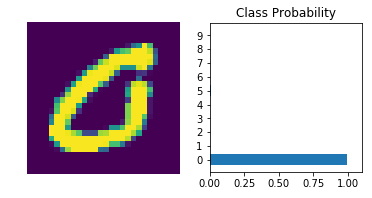

In [40]:
# With the network train we can check out the prediction

import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

# Turn off the torch to speed up its part

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
view_classify(img.view(1,28,28), ps)
